<a href="https://colab.research.google.com/github/yasarigno/NLP_DeepLearning_Course/blob/main/Project_Classification_of_Books_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project : Classification of books by genres

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import data_table
data_table.disable_dataframe_formatter()

If you want to modify a notebook both at local and on colab, you can use the following cell in order to erase or define the path of the file. 

If you work at local, simply put
```python
 Local = True
 ``` 
 

In [3]:
Local = False

In [4]:
if Local:
    data = pd.read_csv("/Users/FIRAT/Desktop/GSU NLP/data.csv")
else:
    data = pd.read_csv("/content/drive/MyDrive/Shared Datasets/Book genres/data.csv")


# Google Colab offers "Data Table Display" extension to turn pandas dataframes into interactive displays that can be filtered, sorted etc.

data

,index,title,genre,summary
0,0,Drowned Wednesday,fantasy,Drowned Wednesday is the first Trustee among ...
1,1,The Lost Hero,fantasy,"As the book opens, Jason awakens on a school ..."
2,2,The Eyes of the Overworld,fantasy,Cugel is easily persuaded by the merchant Fia...
3,3,Magic's Promise,fantasy,The book opens with Herald-Mage Vanyel return...
4,4,Taran Wanderer,fantasy,Taran and Gurgi have returned to Caer Dallben...
...,...,...,...,...
4652,4652,Hounded,fantasy,"Atticus O’Sullivan, last of the Druids, lives ..."
4653,4653,Charlie and the Chocolate Factory,fantasy,Charlie Bucket's wonderful adventure begins wh...
4654,4654,Red Rising,fantasy,"""I live for the dream that my children will be..."
4655,4655,Frostbite,fantasy,"Rose loves Dimitri, Dimitri might love Tasha, ..."


In [5]:
data.describe(include="all")

,index,title,genre,summary
count,4657.000000,4657,4657,4657
unique,NaN,4296,10,4542
top,NaN,Bloodline,thriller,The incredible true story of the women who fou...
freq,NaN,4,1023,3
mean,2328.000000,NaN,NaN,NaN
std,1344.504432,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN
25%,1164.000000,NaN,NaN,NaN
50%,2328.000000,NaN,NaN,NaN
75%,3492.000000,NaN,NaN,NaN


variable 

categorical variable 
numerical variable
- continuous variable
- discrete variable

In [6]:
data["genre"].value_counts()

thriller      1023
fantasy        876
science        647
history        600
horror         600
crime          500
romance        111
psychology     100
sports         100
travel         100
Name: genre, dtype: int64

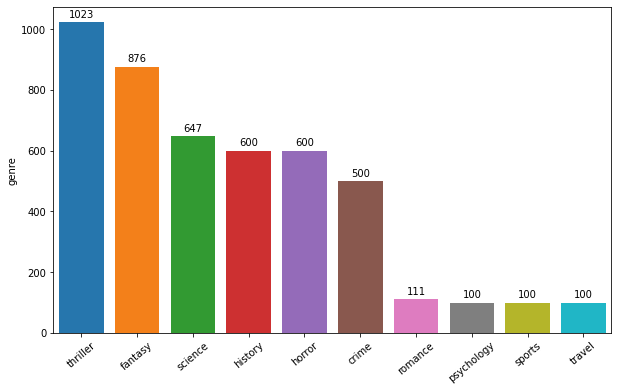

In [7]:
fig = plt.figure(figsize=(10, 6))
plt.xticks(rotation=40)
bp = sns.barplot(
    x=data["genre"].value_counts().index,
    y=data["genre"].value_counts(),
    data=data,
    saturation=0.9,
    # order=order,
    # color='darkred',
    ci=None)

for p in bp.patches:
    bp.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 8),
                textcoords='offset points')
plt.show()

histogram - continuos variable 

barplot - discrete variable

In [8]:
data['summary']

0        Drowned Wednesday is the first Trustee among ...
1        As the book opens, Jason awakens on a school ...
2        Cugel is easily persuaded by the merchant Fia...
3        The book opens with Herald-Mage Vanyel return...
4        Taran and Gurgi have returned to Caer Dallben...
                              ...                        
4652    Atticus O’Sullivan, last of the Druids, lives ...
4653    Charlie Bucket's wonderful adventure begins wh...
4654    "I live for the dream that my children will be...
4655    Rose loves Dimitri, Dimitri might love Tasha, ...
4656    The Prince of no value\nBrishen Khaskem, princ...
Name: summary, Length: 4657, dtype: object

In [9]:
if Local:
  from IPython.display import HTML, display
  def set_css():
      display(HTML('''
      <style>
        pre {
            white-space: pre-wrap;
        }
      </style>
      '''))
  get_ipython().events.register('pre_run_cell', set_css)

In [10]:
for i in range(1150, 1160):
    print('\n# {}. {}\n'.format(i, data['genre'][i]))
    print(data['summary'][i])
    print("----------------------" * 5)


# 1150. crime

 The story starts out inside Rowena Drake's house, which is called "Apple Trees". There, Ariadne Oliver and others are preparing a Hallowe'en party for children. Those in charge of the party are Judith Butler, Mrs. Oliver's friend; Leopold, Joyce and Anne Reynolds, Desmond Holland, Nicholas Ransom, Cathie Johnson, Elizabeth Whittaker, Beatrice Ardley, and others. While they are preparing, thirteen-year old Joyce Reynolds says that she once saw a murder. Everyone, including Mrs. Oliver, thinks she is lying. The party consists of many Hallowe'en-related activities. Mrs. Goodbody plays the role of a witch, and girls can look into a mirror to know what their future husbands will look like (a picture of the husband is said to be reflected in the mirror). The group has supper, the prizes are granted, and the party ends after a game of snapdragon, with the murder of course fitting into the whole situation. The next day, Mrs. Oliver goes to London seeking Hercule Poirot's help.

# Tokenization

In [11]:
import nltk

In [12]:
tokenizer = nltk.tokenize.RegexpTokenizer(r'[a-zA-Z]+')

In [13]:
data['tokenized_summary'] = data.apply(lambda row: tokenizer.tokenize(row['summary']), axis=1)

In [14]:
data['tokenized_summary']

0       [Drowned, Wednesday, is, the, first, Trustee, ...
1       [As, the, book, opens, Jason, awakens, on, a, ...
2       [Cugel, is, easily, persuaded, by, the, mercha...
3       [The, book, opens, with, Herald, Mage, Vanyel,...
4       [Taran, and, Gurgi, have, returned, to, Caer, ...
                              ...                        
4652    [Atticus, O, Sullivan, last, of, the, Druids, ...
4653    [Charlie, Bucket, s, wonderful, adventure, beg...
4654    [I, live, for, the, dream, that, my, children,...
4655    [Rose, loves, Dimitri, Dimitri, might, love, T...
4656    [The, Prince, of, no, value, Brishen, Khaskem,...
Name: tokenized_summary, Length: 4657, dtype: object

In [15]:
data

,index,title,genre,summary,tokenized_summary
0,0,Drowned Wednesday,fantasy,Drowned Wednesday is the first Trustee among ...,"[Drowned, Wednesday, is, the, first, Trustee, ..."
1,1,The Lost Hero,fantasy,"As the book opens, Jason awakens on a school ...","[As, the, book, opens, Jason, awakens, on, a, ..."
2,2,The Eyes of the Overworld,fantasy,Cugel is easily persuaded by the merchant Fia...,"[Cugel, is, easily, persuaded, by, the, mercha..."
3,3,Magic's Promise,fantasy,The book opens with Herald-Mage Vanyel return...,"[The, book, opens, with, Herald, Mage, Vanyel,..."
4,4,Taran Wanderer,fantasy,Taran and Gurgi have returned to Caer Dallben...,"[Taran, and, Gurgi, have, returned, to, Caer, ..."
...,...,...,...,...,...
4652,4652,Hounded,fantasy,"Atticus O’Sullivan, last of the Druids, lives ...","[Atticus, O, Sullivan, last, of, the, Druids, ..."
4653,4653,Charlie and the Chocolate Factory,fantasy,Charlie Bucket's wonderful adventure begins wh...,"[Charlie, Bucket, s, wonderful, adventure, beg..."
4654,4654,Red Rising,fantasy,"""I live for the dream that my children will be...","[I, live, for, the, dream, that, my, children,..."
4655,4655,Frostbite,fantasy,"Rose loves Dimitri, Dimitri might love Tasha, ...","[Rose, loves, Dimitri, Dimitri, might, love, T..."


In [16]:
type(data['tokenized_summary'][0])

list

In [17]:
def list_to_string (l):
    string = ''.join(l)
    string = string.replace(' ', ', ')
    return string

def string_to_list(string):
    l = list(string.split(", "))
    return l

In [18]:
data['tokenized_summary_str'] = data.apply(lambda row: list_to_string(row['summary']), axis=1)

In [19]:
data['tokenized_summary_str']

0       , Drowned, Wednesday, is, the, first, Trustee,...
1       , As, the, book, opens,, Jason, awakens, on, a...
2       , Cugel, is, easily, persuaded, by, the, merch...
3       , The, book, opens, with, Herald-Mage, Vanyel,...
4       , Taran, and, Gurgi, have, returned, to, Caer,...
                              ...                        
4652    Atticus, O’Sullivan,, last, of, the, Druids,, ...
4653    Charlie, Bucket's, wonderful, adventure, begin...
4654    "I, live, for, the, dream, that, my, children,...
4655    Rose, loves, Dimitri,, Dimitri, might, love, T...
4656    The, Prince, of, no, value\nBrishen, Khaskem,,...
Name: tokenized_summary_str, Length: 4657, dtype: object

In [20]:
data.head(10)

,index,title,genre,summary,tokenized_summary,tokenized_summary_str
0,0,Drowned Wednesday,fantasy,Drowned Wednesday is the first Trustee among ...,"[Drowned, Wednesday, is, the, first, Trustee, ...",", Drowned, Wednesday, is, the, first, Trustee,..."
1,1,The Lost Hero,fantasy,"As the book opens, Jason awakens on a school ...","[As, the, book, opens, Jason, awakens, on, a, ...",", As, the, book, opens,, Jason, awakens, on, a..."
2,2,The Eyes of the Overworld,fantasy,Cugel is easily persuaded by the merchant Fia...,"[Cugel, is, easily, persuaded, by, the, mercha...",", Cugel, is, easily, persuaded, by, the, merch..."
3,3,Magic's Promise,fantasy,The book opens with Herald-Mage Vanyel return...,"[The, book, opens, with, Herald, Mage, Vanyel,...",", The, book, opens, with, Herald-Mage, Vanyel,..."
4,4,Taran Wanderer,fantasy,Taran and Gurgi have returned to Caer Dallben...,"[Taran, and, Gurgi, have, returned, to, Caer, ...",", Taran, and, Gurgi, have, returned, to, Caer,..."
5,5,Thendara House,fantasy,The novel concerns the dwelling of the Darkov...,"[The, novel, concerns, the, dwelling, of, the,...",", The, novel, concerns, the, dwelling, of, the..."
6,6,The Thief,fantasy,"Gen is released from prison by the magus, the...","[Gen, is, released, from, prison, by, the, mag...",", Gen, is, released, from, prison, by, the, ma..."
7,7,The Sweet Far Thing,fantasy,The prologue begins with two men who are sear...,"[The, prologue, begins, with, two, men, who, a...",", The, prologue, begins, with, two, men, who, ..."
8,8,Mistborn: The Final Empire,fantasy,"In Luthadel, the capital city of the Final Em...","[In, Luthadel, the, capital, city, of, the, Fi...",", In, Luthadel,, the, capital, city, of, the, ..."
9,9,The Sorcerer's Ship,fantasy,A man named Gene finds himself cast into a ne...,"[A, man, named, Gene, finds, himself, cast, in...",", A, man, named, Gene, finds, himself, cast, i..."


In [21]:
type(data['tokenized_summary_str'][0])

str

In [22]:
def top_words(df, column, nb_top):
    count_keyword = dict()
    for index, col in df[column].iteritems():
        if isinstance(col, float):
            continue
        for word in col.split(','):
            if word in count_keyword.keys():
                count_keyword[word] += 1
            else:
                count_keyword[word] = 1

    keyword_top = []
    for k, v in count_keyword.items():
        keyword_top.append([k, v])
    keyword_top.sort(key=lambda x: x[1], reverse=True)

    return keyword_top[:nb_top]

from wordcloud import WordCloud

def plot_world_cloud(df,
                     column,
                     nb_top):
    fig = plt.figure(1, figsize=(18, 12))
    ax1 = fig.add_subplot(1, 1, 1)

    words = dict()
    trunc_occurences = top_words(df, column, nb_top)
    for s in trunc_occurences:
        words[s[0]] = s[1]

    word_cloud = WordCloud(width=1000,
                           height=600,
                           normalize_plurals=False,
                           background_color='#424342',
                           colormap='Set2',
                           random_state=4
                           # mask=mask
                          )
    word_cloud.generate_from_frequencies(words)
    ax1.imshow(word_cloud, interpolation="bilinear")
    ax1.axis('off')
    plt.title("Word Cloud for the column {} (top {}) \n".format(
        column, nb_top))
    plt.show()

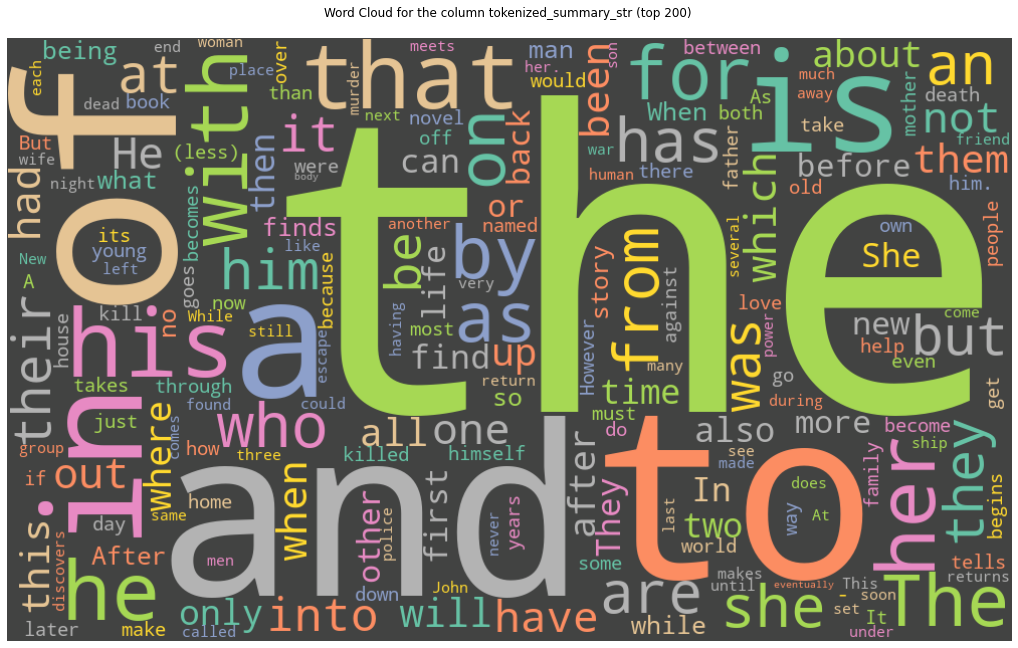

In [23]:
plot_world_cloud(df=data, column="tokenized_summary_str", nb_top=200)

# Vectorization

In [24]:
# Préparation des labels et des données

from sklearn.model_selection import train_test_split

y = data['genre'].astype('category').cat.codes

X_train, X_test, y_train, y_test = train_test_split(list(data['tokenized_summary_str']), y, 
                                                   test_size=0.2, 
                                                   random_state = 0, 
                                                   #stratify = y,
                                                   shuffle=True)

In [25]:
max_length = max(data['tokenized_summary_str'].apply(lambda row : len(row)))
max_length

36926

In [26]:
# Utilisation d'un preprocesseur

from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

vectorizer = TextVectorization(max_tokens=20000, output_sequence_length=max_length)
vectorizer.adapt(X_train)

In [27]:
# Aperçu des 5 premiers mots dans ma liste de vocabulaire 

vectorizer.get_vocabulary()[:6]

['', '[UNK]', 'the', 'to', 'and', 'of']

In [28]:
# Extraction de l'embedding Glove en 50 dimensions
import os 

path_to_glove_file = os.path.join(
    os.path.expanduser("~"), "/content/drive/MyDrive/Shared Datasets/Embeddings/glove.6B.50d.txt"
)

embeddings_index = {}
with open(path_to_glove_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))

Found 400000 word vectors.


In [29]:
# Préparation de la matrix d'embedding

voc = vectorizer.get_vocabulary()
word_index = dict(zip(voc, range(len(voc))))

num_tokens = len(voc) + 2
embedding_dim = 50
hits = 0
misses = 0


embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))

Converted 18178 words (1822 misses)


## Word embedding

In [30]:
# Instanciation de la matrice d'embedding

from tensorflow.keras.layers import Embedding
from tensorflow.keras import initializers

embedding_layer = Embedding(
    num_tokens,
    embedding_dim,
    embeddings_initializer=initializers.Constant(embedding_matrix),
    trainable=False,
)

In [31]:
genres = data['genre'].unique()

In [32]:
from tensorflow.keras import layers, Input, Model

int_sequences_input = Input(shape=(None,), dtype="int64")
embedded_sequences = embedding_layer(int_sequences_input)
x = layers.BatchNormalization(epsilon=1e-05, momentum=0.1)(embedded_sequences)
x = layers.Conv1D(128, 5, activation="relu")(x)
x = layers.Dropout(0.5)(x)
x = layers.MaxPooling1D(5)(x)
x = layers.BatchNormalization(epsilon=1e-05, momentum=0.1)(x)
x = layers.Conv1D(128, 5, activation="relu")(x)
x = layers.MaxPooling1D(5)(x)
x = layers.Conv1D(128, 5, activation="relu")(x)
x = layers.GlobalMaxPooling1D()(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dropout(0.5)(x)
output_nlp = layers.Dense(len(genres), activation="softmax")(x)
                          
model_nlp = Model(int_sequences_input, output_nlp)
model_nlp.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding (Embedding)       (None, None, 50)          1000100   
                                                                 
 batch_normalization (BatchN  (None, None, 50)         200       
 ormalization)                                                   
                                                                 
 conv1d (Conv1D)             (None, None, 128)         32128     
                                                                 
 dropout (Dropout)           (None, None, 128)         0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, None, 128)        0         
 )                                                           

In [33]:
x_train = vectorizer(np.array([[s] for s in X_train])).numpy()
x_test = vectorizer(np.array([[s] for s in X_test])).numpy()

y_train = np.array(y_train)
y_test = np.array(y_test)

In [34]:
# Entraînement

# callback = callbacks.EarlyStopping(monitor='val_loss', patience=5)

model_nlp.compile(
    loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["acc"]
)
history = model_nlp.fit(x_train, y_train,
                        batch_size=16, 
                        #callbacks=callback, 
                        epochs=15,
                        validation_split=0.2,
                        verbose=2)

Epoch 1/15
187/187 - 37s - loss: 2.7630 - acc: 0.1738 - val_loss: 2.0554 - val_acc: 0.2255 - 37s/epoch - 196ms/step
Epoch 2/15
187/187 - 26s - loss: 2.0780 - acc: 0.2097 - val_loss: 1.9629 - val_acc: 0.2617 - 26s/epoch - 140ms/step
Epoch 3/15
187/187 - 26s - loss: 1.9483 - acc: 0.2668 - val_loss: 1.8340 - val_acc: 0.3638 - 26s/epoch - 138ms/step
Epoch 4/15
187/187 - 26s - loss: 1.7870 - acc: 0.3591 - val_loss: 1.6165 - val_acc: 0.3960 - 26s/epoch - 138ms/step
Epoch 5/15
187/187 - 26s - loss: 1.6216 - acc: 0.4027 - val_loss: 1.4739 - val_acc: 0.4591 - 26s/epoch - 139ms/step
Epoch 6/15
187/187 - 26s - loss: 1.5368 - acc: 0.4379 - val_loss: 1.5665 - val_acc: 0.4215 - 26s/epoch - 139ms/step
Epoch 7/15
187/187 - 26s - loss: 1.5087 - acc: 0.4389 - val_loss: 1.4973 - val_acc: 0.4228 - 26s/epoch - 139ms/step
Epoch 8/15
187/187 - 26s - loss: 1.4456 - acc: 0.4644 - val_loss: 1.4492 - val_acc: 0.4671 - 26s/epoch - 139ms/step
Epoch 9/15
187/187 - 26s - loss: 1.3747 - acc: 0.4856 - val_loss: 1.3599

In [35]:
def PlotModel(history=history, metric='acc', metric_val='val_acc', loss='loss',
              val_loss='val_loss'):  
  ### Graphique des résultats de l'entraînement ###
  plt.plot(history.history[metric])
  plt.plot(history.history[metric_val])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()
  plt.plot(history.history[loss])
  plt.plot(history.history[val_loss])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()


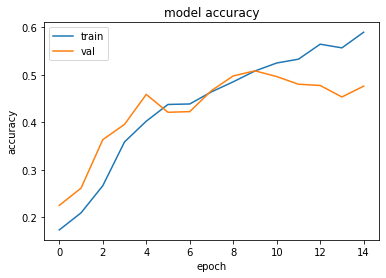

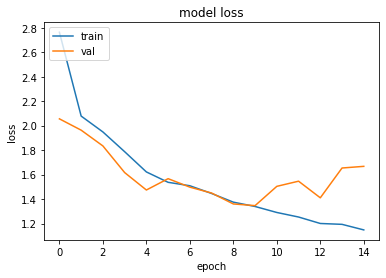

In [36]:
PlotModel(history=history)

In [37]:
model_nlp.evaluate(x=x_test, y=y_test, batch_size=16, verbose=2)

59/59 - 2s - loss: 1.6317 - acc: 0.4732 - 2s/epoch - 40ms/step


[1.6316977739334106, 0.473175972700119]